In [5]:
import pickle
import pandas as pd

In [6]:
hf_pytorch = pickle.load(open("/mnt/home/TF_NEW/bert_sequence_length_benchmark/tf_pt_bert_benchmark_gpu.pkl", "rb"))
hf_tensorflow = pickle.load(open("/mnt/home/TF_NEW/bert_sequence_length_benchmark/tf_hf_bert_benchmark_gpu.pkl", "rb"))
tf_transformers_tensorflow = pickle.load(open("/mnt/home/TF_NEW/bert_sequence_length_benchmark/tft_bert_benchmark_gpu.pkl", "rb"))

# Sequence Length

24

In [11]:
# Columns
keys = hf_pytorch['hf_pt_forward'].keys()

# results
results = []
results.append(list(hf_pytorch['hf_pt_forward'].values()))
results.append(list(hf_tensorflow['hf_tf_forward'].values())[:len(keys)])
results.append(list(tf_transformers_tensorflow['tft_forward'].values())[:len(keys)])

df_sequence_length = pd.DataFrame(results)

# columns and index
df_sequence_length.columns = keys
df_sequence_length.index   = ['hf_pytorch', 'hf_tensorflow', 'tf_transformers_tensorflow']

In [12]:
# Highlight
df_sequence_length.style.highlight_min(color = 'lightgreen', axis = 0)


In [13]:
df_sequence_length.sample(n = 10, axis='columns').style.highlight_min(color = 'lightgreen', axis = 0)


,16,1,4,16,8,16,8,4,1,8
,20,20,512,128,512,512,20,20,512,128
hf_pytorch,0.074036,0.019506,0.033628,0.018099,0.026535,0.119468,0.018863,0.018343,0.025359,0.018468
hf_tensorflow,0.068555,0.068123,0.067980,0.064803,0.098909,0.188656,0.067961,0.066232,0.071382,0.067540
tf_transformers_tensorflow,0.015866,0.007140,0.067742,0.059833,0.131381,0.257125,0.009968,0.007482,0.021642,0.030202


# Find the count of index based on speed


In [14]:
df_sequence_length.idxmin(axis=0).value_counts()

hf_pytorch                    13
tf_transformers_tensorflow    11
dtype: int64

# Greedy Visualize

Text(0, 0.5, 'Time in Seconds')

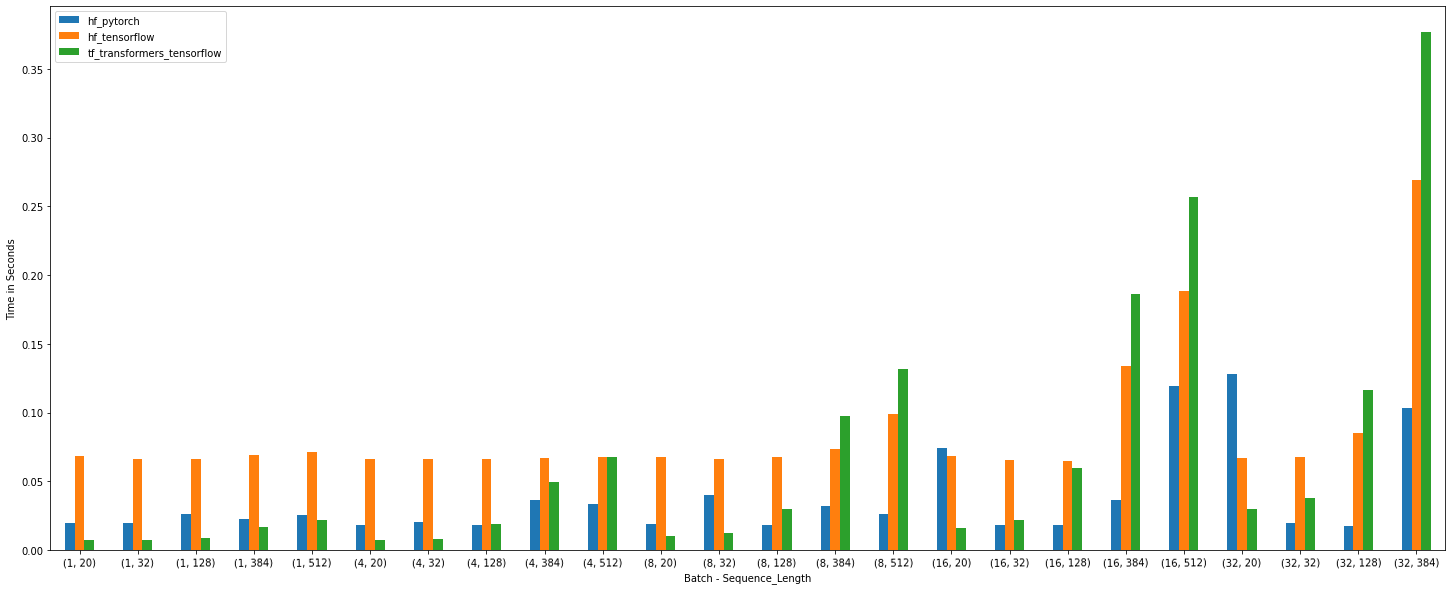

In [15]:
ax = df_sequence_length.transpose().plot.bar(rot=1, figsize=(25,10))
ax.set_xlabel("Batch - Sequence_Length")
ax.set_ylabel("Time in Seconds")